<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16209 entries, 0 to 16208
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             16209 non-null  int64  
 1   date           16209 non-null  object 
 2   price          16209 non-null  int64  
 3   bedrooms       16209 non-null  int64  
 4   bathrooms      16209 non-null  float64
 5   sqft_living    16209 non-null  int64  
 6   sqft_lot       16209 non-null  int64  
 7   floors         16209 non-null  float64
 8   waterfront     16209 non-null  int64  
 9   view           16209 non-null  int64  
 10  condition      16209 non-null  int64  
 11  grade          16209 non-null  int64  
 12  sqft_above     16209 non-null  int64  
 13  sqft_basement  16209 non-null  int64  
 14  yr_built       16209 non-null  int64  
 15  yr_renovated   16209 non-null  int64  
 16  zipcode        16209 non-null  int64  
 17  lat            16209 non-null  float64
 18  long  

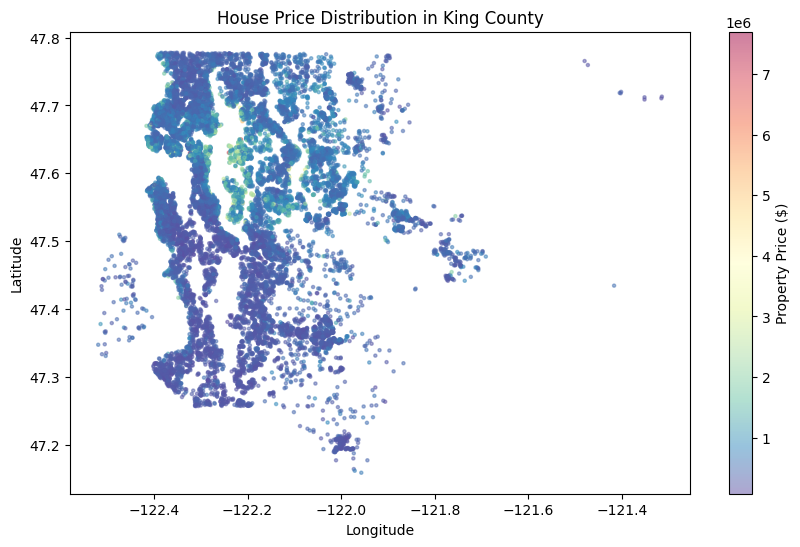

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_excel("data/raw/train.xlsx")

print(df.info())

plt.figure(figsize=(10, 6))
plt.scatter(df['long'], df['lat'], c=df['price'], cmap='Spectral_r', s=5, alpha=0.5)
plt.colorbar(label='Property Price ($)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('House Price Distribution in King County')
plt.show()

In [5]:
!pip install pandas seaborn matplotlib openpyxl ipykernel

In [4]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [5]:
import sys
import os

# Notebook ko batana ki 'src' folder mein hamara code hai
sys.path.append(os.path.abspath("src"))

# Ab ye chal jayega
from model import MultimodalModel
from dataset import MultimodalHousingDataset, data_transforms

In [3]:
!pip install torchvision

In [7]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# 1. Price ko Log Scale pe convert karna (Regression ke liye best practice hai)
df['price_log'] = np.log1p(df['price'])

# 2. Un-necessary columns drop karna
# Date aur ID tabular model ko confuse kar sakte hain
features_to_use = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 
                   'waterfront', 'view', 'condition', 'grade', 'yr_built', 'lat', 'long']

X = df[features_to_use]
y = df['price_log']

# 3. Scaling: Numbers ko chota karna (0 se 1 ke beech)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Data Preprocessing complete. Ready for the Multimodal Model!")

Data Preprocessing complete. Ready for the Multimodal Model!


In [8]:
import os

# Check download count
image_folder = "data/satellite_images"
downloaded_images = [f.split('.')[0] for f in os.listdir(image_folder) if f.endswith('.jpg')]

print(f"Total Images Downloaded: {len(downloaded_images)}")

# Excel mein sirf wahi rows rakho jinki images hamare paas hain
df['id_str'] = df['id'].astype(str)
df_final = df[df['id_str'].isin(downloaded_images)]

print(f"Final Dataset Size for Training: {len(df_final)}")

Total Images Downloaded: 15841
Final Dataset Size for Training: 15940


In [9]:
df['age'] = 2024 - df['yr_built'] 
df['total_rooms'] = df['bedrooms'] + df['bathrooms']

In [9]:
# 1. Naye features calculate karo
df['age'] = 2026 - df['yr_built'] # Current year 2026 ke hisab se
df['total_rooms'] = df['bedrooms'] + df['bathrooms']
df['sqft_per_room'] = df['sqft_living'] / (df['total_rooms'] + 1)

# 2. In 14 columns ko CSV mein save karo
features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 
            'waterfront', 'view', 'condition', 'grade', 'lat', 'long', 
            'age', 'total_rooms', 'sqft_per_room']

# Ensure df_final has these columns and save to "data/processed/train_ready.csv"

In [2]:
pip install torch


Note: you may need to restart the kernel to use updated packages.


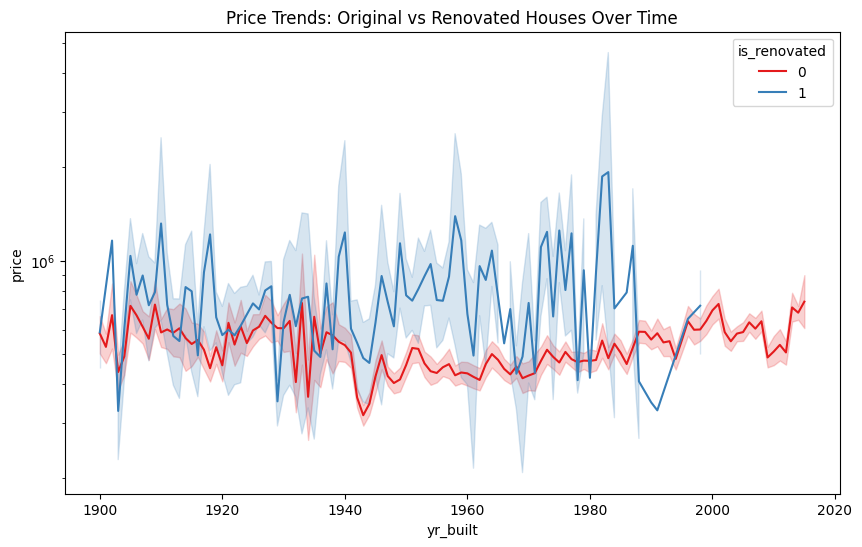

In [20]:

df['is_renovated'] = df['yr_renovated'].apply(lambda x: 1 if x > 0 else 0)

plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='yr_built', y='price', hue='is_renovated', palette='Set1')
plt.yscale('log')
plt.title('Price Trends: Original vs Renovated Houses Over Time')
plt.show()

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import os
import sys
!pip install tqdm
from tqdm import tqdm

# src folder link karna
sys.path.append(os.path.abspath("src"))
from model import MultimodalModel
from dataset import MultimodalHousingDataset, data_transforms
from torch.utils.data import DataLoader

print("Setup Complete. Model will use 12 Tabular Features.")

  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
Using cached tqdm-4.67.1-py3-none-any.whl (78 kB)
Setup Complete. Model will use 12 Tabular Features.


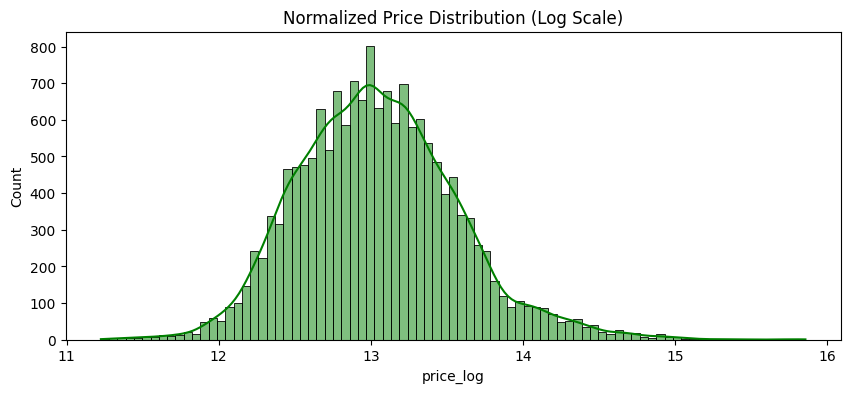

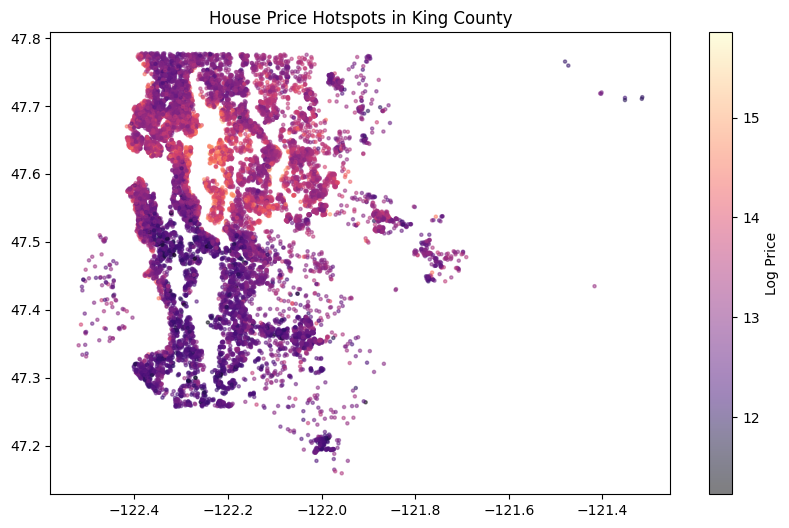

In [26]:
# 1. Load Raw Data
df = pd.read_excel("data/raw/train.xlsx")

# 2. Advanced Feature Calculation (Sirf EDA aur Insights ke liye)
df['age'] = 2026 - df['yr_built'] 
df['total_rooms'] = df['bedrooms'] + df['bathrooms']
df['sqft_per_room'] = df['sqft_living'] / (df['total_rooms'] + 1)
df['price_log'] = np.log1p(df['price'])

# EDA Graph 1: Price Distribution
plt.figure(figsize=(10, 4))
sns.histplot(df['price_log'], kde=True, color='green')
plt.title("Normalized Price Distribution (Log Scale)")
plt.show()

# EDA Graph 2: Geospatial Map
plt.figure(figsize=(10, 6))
plt.scatter(df['long'], df['lat'], c=df['price_log'], cmap='magma', s=5, alpha=0.5)
plt.colorbar(label='Log Price')
plt.title('House Price Hotspots in King County')
plt.show()

In [27]:
# 1. Exact 12 features jo model training mein use hue the
features_12 = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 
               'waterfront', 'view', 'condition', 'grade', 'yr_built', 'lat', 'long']

# 2. Image verification
image_folder = "data/satellite_images"
downloaded_ids = [f.split('.')[0] for f in os.listdir(image_folder) if f.endswith('.jpg')]
df['id_str'] = df['id'].astype(str)
df_final = df[df['id_str'].isin(downloaded_ids)].copy()

# 3. Processed CSV Save (Isme sirf wahi columns honge jo model ko chahiye + id/price)
columns_to_save = ['id', 'price'] + features_12
df_final[columns_to_save].to_csv("data/processed/train_ready.csv", index=False)

print(f"Data synced! Total 12 features selected for the model.")

Data synced! Total 12 features selected for the model.


In [30]:
# 1. Exact 12 features jo model training mein use hue the
features_12 = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 
               'waterfront', 'view', 'condition', 'grade', 'yr_built', 'lat', 'long']

# 2. Image verification
image_folder = "data/satellite_images"
downloaded_ids = [f.split('.')[0] for f in os.listdir(image_folder) if f.endswith('.jpg')]
df['id_str'] = df['id'].astype(str)
df_final = df[df['id_str'].isin(downloaded_ids)].copy()

# --- YAHAN CHANGE HAI ---
# 3. 'price_log' column create karo aur 'price' ke saath save karo
df_final['price_log'] = np.log1p(df_final['price'])

# Columns to save list mein 'price_log' add karo
columns_to_save = ['id', 'price', 'price_log'] + features_12
df_final[columns_to_save].to_csv("data/processed/train_ready.csv", index=False)
# ------------------------

print(f"Data synced! 'price_log' added to CSV. Total rows: {len(df_final)}")

Data synced! 'price_log' added to CSV. Total rows: 15940


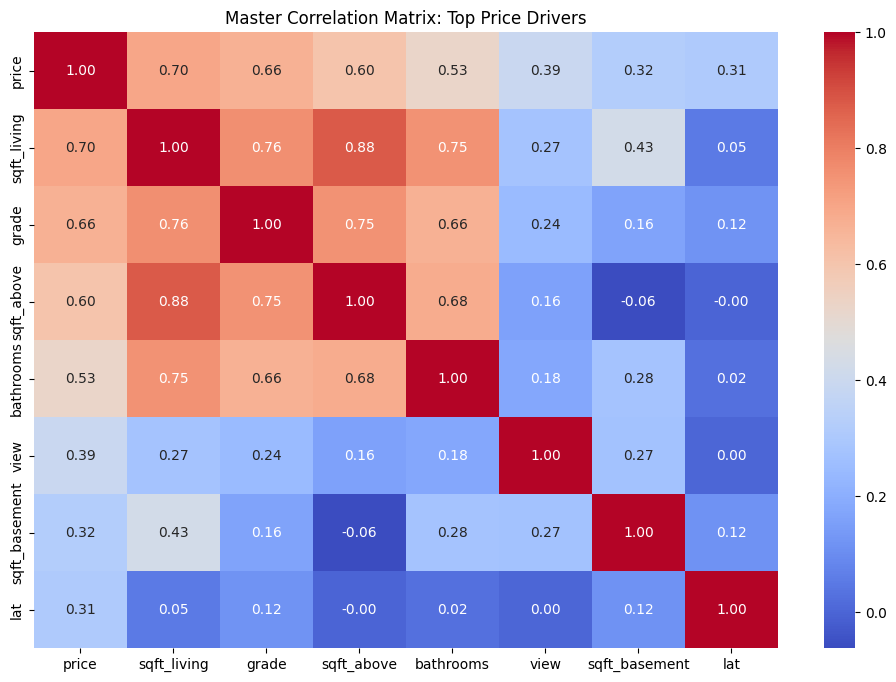

In [32]:
plt.figure(figsize=(12, 8))
# Sirf top features ka correlation heatmap
top_features = ['price', 'sqft_living', 'grade', 'sqft_above', 'bathrooms', 'view', 'sqft_basement', 'lat']
sns.heatmap(df[top_features].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Master Correlation Matrix: Top Price Drivers")
plt.show()

C:\Users\manan\AppData\Local\Temp\ipykernel_37720\2088647733.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x='bedrooms', y='price', data=df, palette='magma')


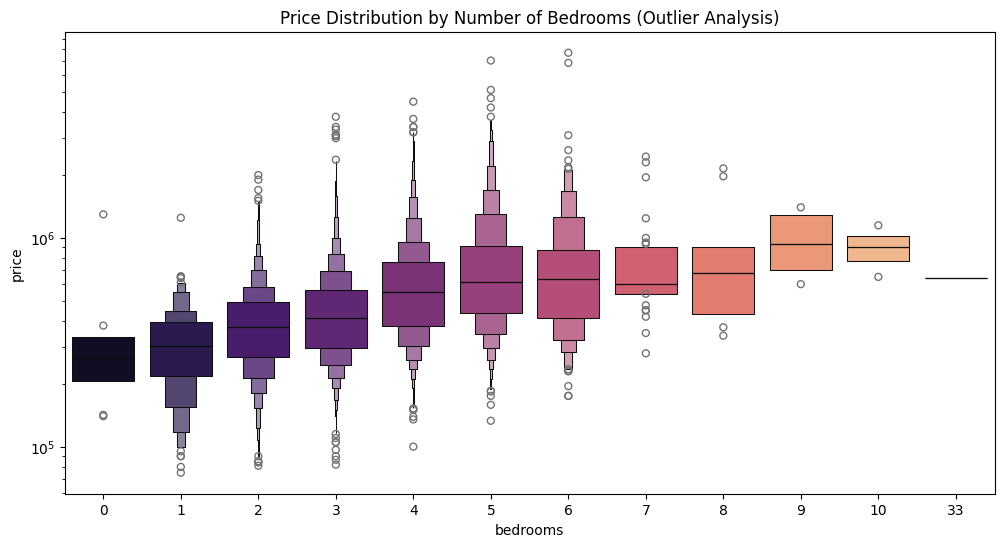

In [33]:
plt.figure(figsize=(12, 6))
sns.boxenplot(x='bedrooms', y='price', data=df, palette='magma')
plt.yscale('log')
plt.title('Price Distribution by Number of Bedrooms (Outlier Analysis)')
plt.show()

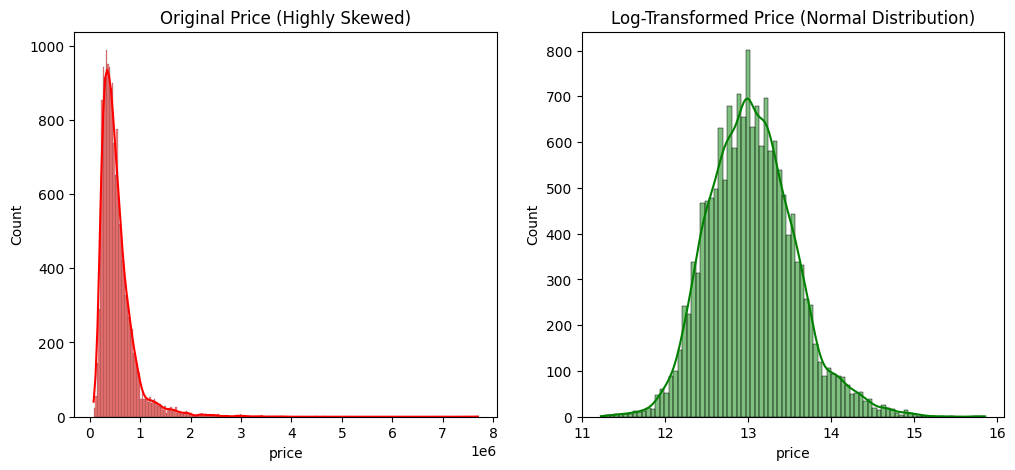

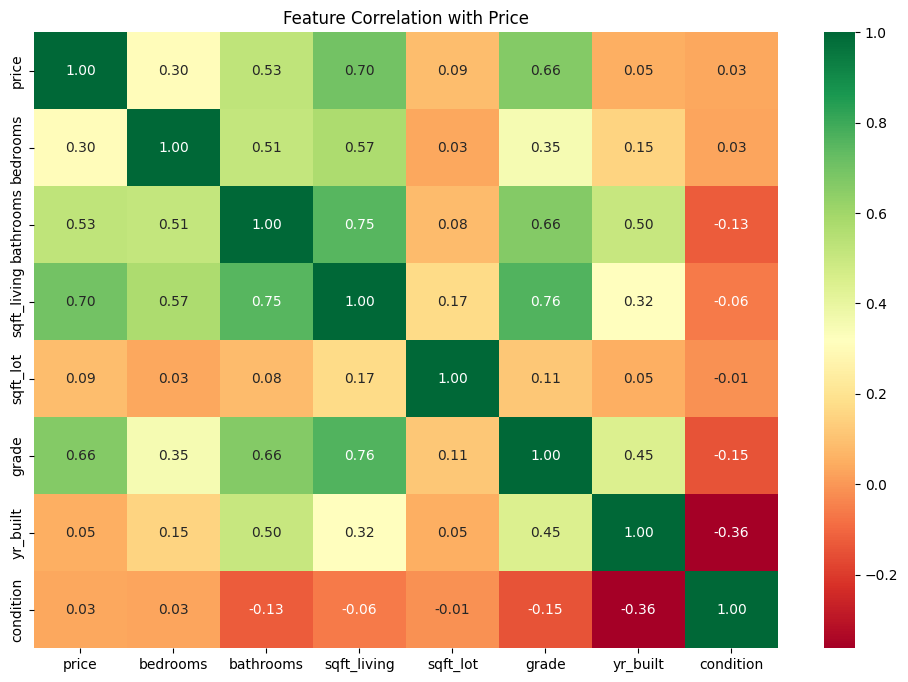

C:\Users\manan\AppData\Local\Temp\ipykernel_21020\38699410.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='grade', y='price', data=df, palette='viridis')


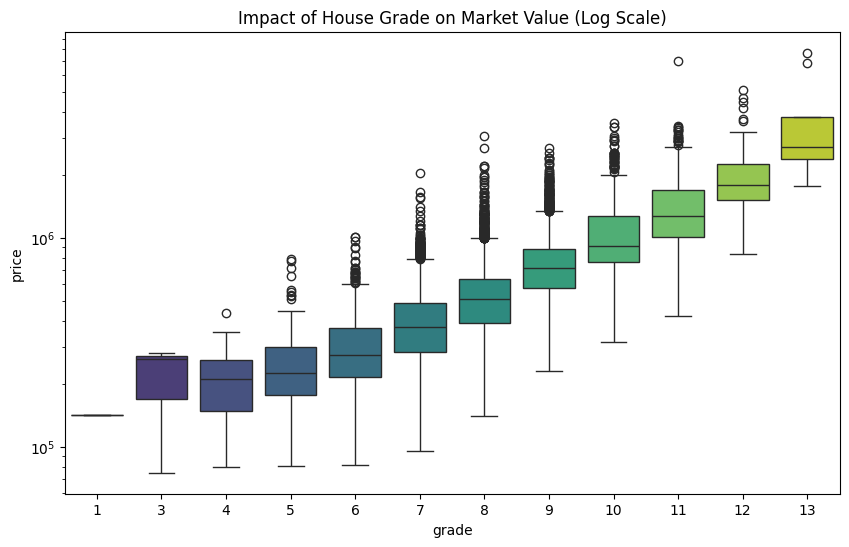

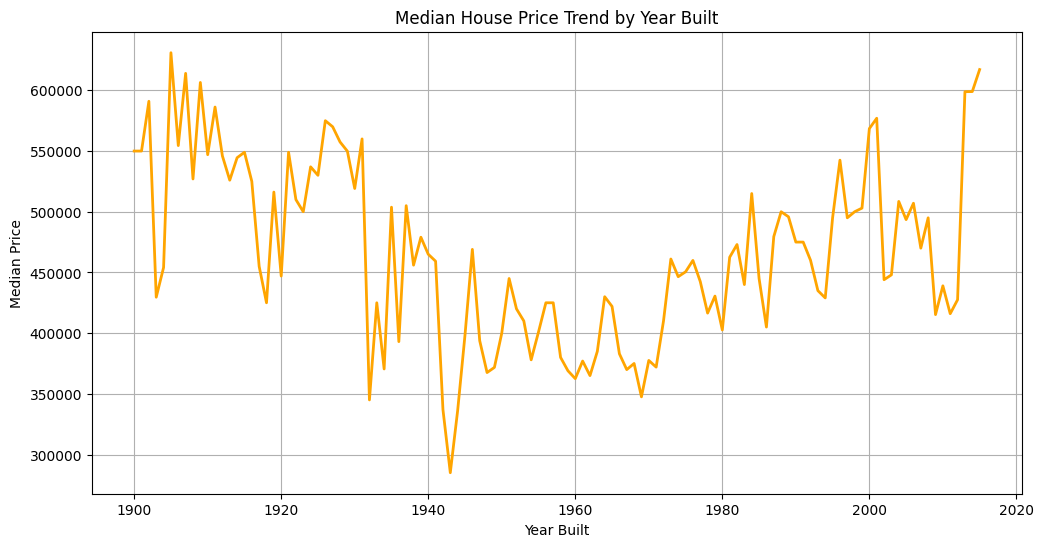

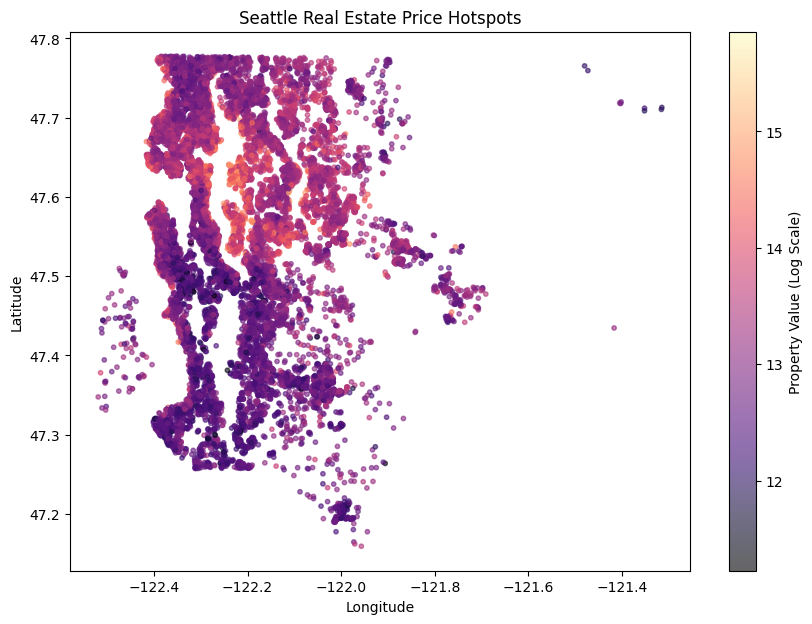

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_excel("data/raw/train.xlsx")


plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['price'], kde=True, color='red')
plt.title('Original Price (Highly Skewed)')

plt.subplot(1, 2, 2)
sns.histplot(np.log1p(df['price']), kde=True, color='green')
plt.title('Log-Transformed Price (Normal Distribution)')
plt.show()

plt.figure(figsize=(12, 8))
top_features = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'grade', 'yr_built', 'condition']
sns.heatmap(df[top_features].corr(), annot=True, cmap='RdYlGn', fmt=".2f")
plt.title('Feature Correlation with Price')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='grade', y='price', data=df, palette='viridis')
plt.yscale('log')
plt.title('Impact of House Grade on Market Value (Log Scale)')
plt.show()


plt.figure(figsize=(12, 6))
df.groupby('yr_built')['price'].median().plot(color='orange', linewidth=2)
plt.title('Median House Price Trend by Year Built')
plt.xlabel('Year Built')
plt.ylabel('Median Price')
plt.grid(True)
plt.show()


plt.figure(figsize=(10, 7))
plt.scatter(df['long'], df['lat'], c=np.log1p(df['price']), cmap='magma', s=10, alpha=0.6)
plt.colorbar(label='Property Value (Log Scale)')
plt.title('Seattle Real Estate Price Hotspots')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

C:\Users\manan\AppData\Local\Temp\ipykernel_37720\3764153752.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='condition', y='price', data=df, palette='Set2')
C:\Users\manan\AppData\Local\Temp\ipykernel_37720\3764153752.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='is_renovated', y='price', data=df, palette='Pastel1')


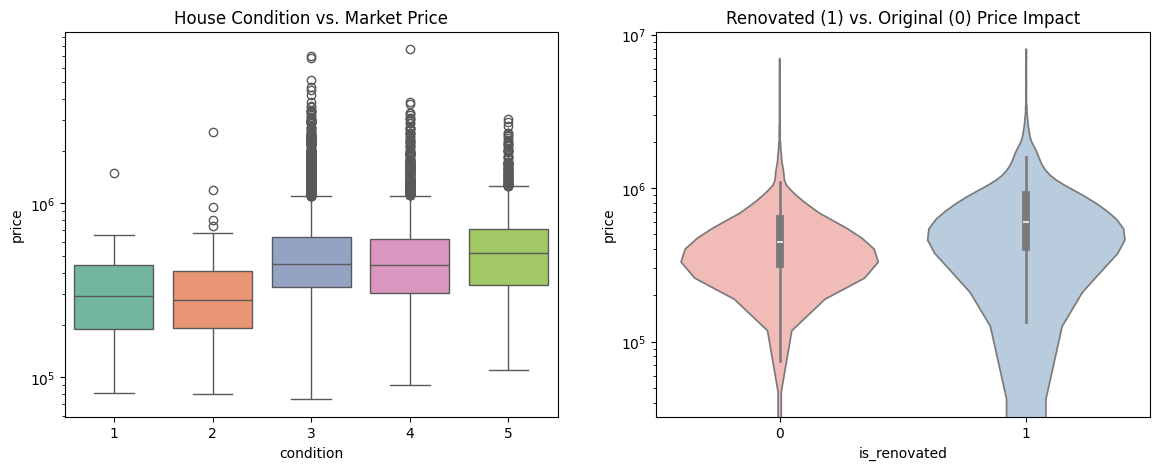

In [35]:
plt.figure(figsize=(14, 5))

# Plot A: Condition vs Price
plt.subplot(1, 2, 1)
sns.boxplot(x='condition', y='price', data=df, palette='Set2')
plt.yscale('log')
plt.title("House Condition vs. Market Price")

# Plot B: Renovation Impact
df['is_renovated'] = (df['yr_renovated'] > 0).astype(int)
plt.subplot(1, 2, 2)
sns.violinplot(x='is_renovated', y='price', data=df, palette='Pastel1')
plt.yscale('log')
plt.title("Renovated (1) vs. Original (0) Price Impact")
plt.show()

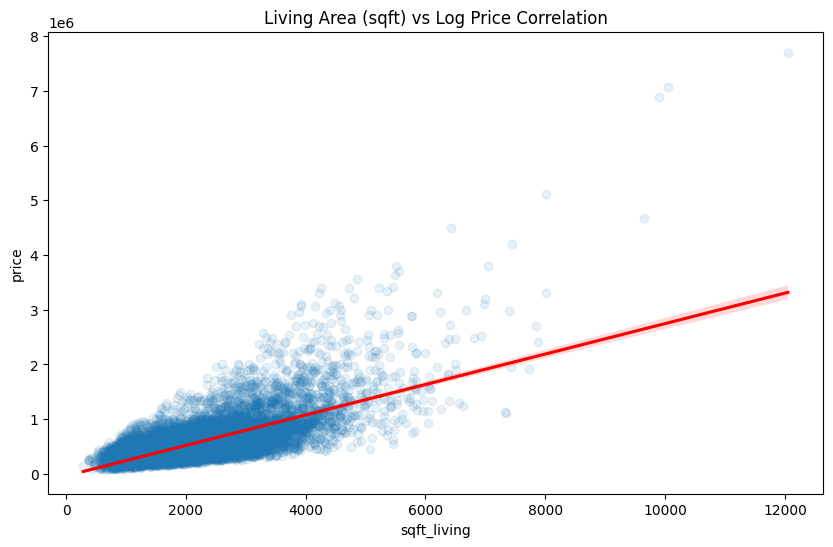

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='sqft_living', y='price', scatter_kws={'alpha':0.1}, line_kws={'color':'red'})
plt.title("Living Area (sqft) vs Price Correlation")
plt.show()

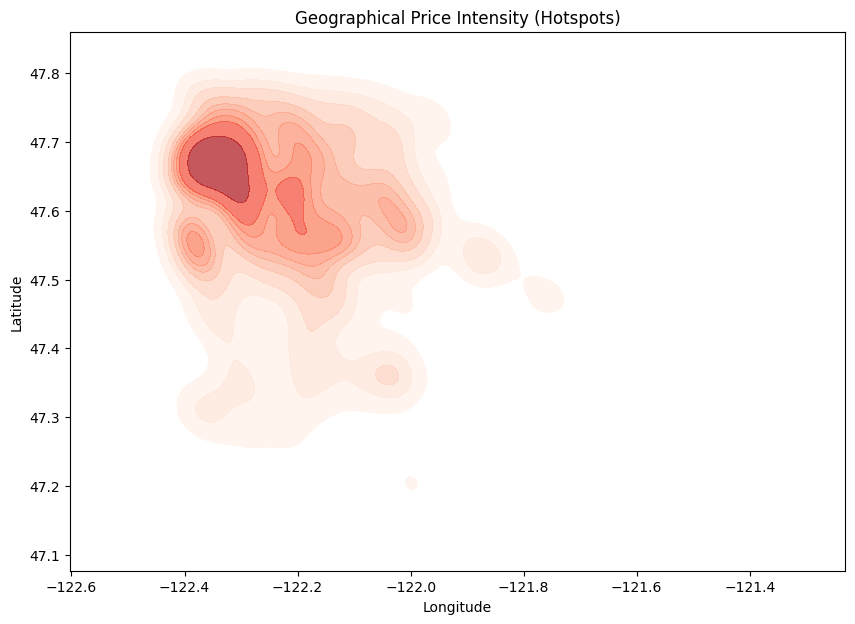

In [15]:
plt.figure(figsize=(10, 7))
# KDE Plot for Density
sns.kdeplot(data=df, x="long", y="lat", weights="price", cmap="Reds", fill=True, thresh=0.05, alpha=0.7)
plt.title("Geographical Price Intensity (Hotspots)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()